<a href="https://colab.research.google.com/github/vishant750/cardiovascular_risk_prediction/blob/main/cardiovascular_risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title - Cardiovascular Risk Prediction**

## Project Type - Classification
## Contribution - Individual
## Individual Name - Vishant Kumar

# **Problem Description**

##Cardiovascular study on residents of the town of Fromingham,Massachusetts is given the aim of this classification project is to predict whether the patient has a 10-year risk of future coronary heart disease(CHD). The dataset provides the patients information. It includes over 4000 records and 15 attributes. Each attribute is a potential risk factor. There are both demographic behavioral and medical risk factors.

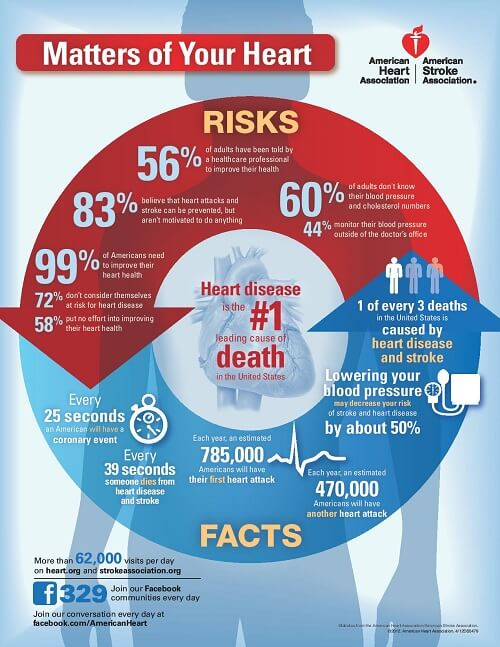

# **Data Description**

## The dataset contains potential cardiovascular attributes.The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. 


## Attributes Information-



## 1.   Sex - gender
## 2.   Age - age of the individual
## 3.   is_smoking - whether taking BP meds or not
## 4.   Cigs_per_day - the number of cigarettes that the person smoked on average in one day.
## 5.   BP_Meds - whether or not the patient was on blood pressure medication
## 6.   Prevalent Stroke - whether or not the patient had previously had a stroke 
## 7.   Prevalent Hyp - whether or not the patient was hypertensive 
## 8.   Diabetes - whether or not the patient had diabetes
## 9.   Tot Chol - total cholesterol level 
## 10.  Sys BP - systolic blood pressure
## 11.  Dia BP -diastolic blood pressure
## 12.  BMI - Body Mass Index
## 13.  Heart Rate - heart rate
## 14.  Glucose - glucose level
## 15.  TenYearCHD-10-year risk of coronary heart disease CHD


# **Initial preparation**

In [1]:
#Importing the dependencies
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
##Loading the data
cardiovascular_risk_pred=pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv',index_col='id')

# **EDA**

In [4]:
#First 5 observation
cardiovascular_risk_pred

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


In [5]:
#Last 5 observations
cardiovascular_risk_pred.tail()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
id,,,,,,,,,,,,,,,,
3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#Shape of the dataset
cardiovascular_risk_pred.shape

(3390, 16)

We have 3,390 observations and 16 columns

In [7]:
#Columns
cardiovascular_risk_pred.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [8]:
#Summary of the dataframe
cardiovascular_risk_pred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 450.2+ KB


In [9]:
#Statistical summary of dataframe
cardiovascular_risk_pred.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [10]:
#Checking the target variable
cardiovascular_risk_pred['TenYearCHD'].value_counts()

0    2879
1     511
Name: TenYearCHD, dtype: int64

## Which age group is most likely to have a higher CHD risk factor.


Text(0, 0.5, 'TenYearCHD')

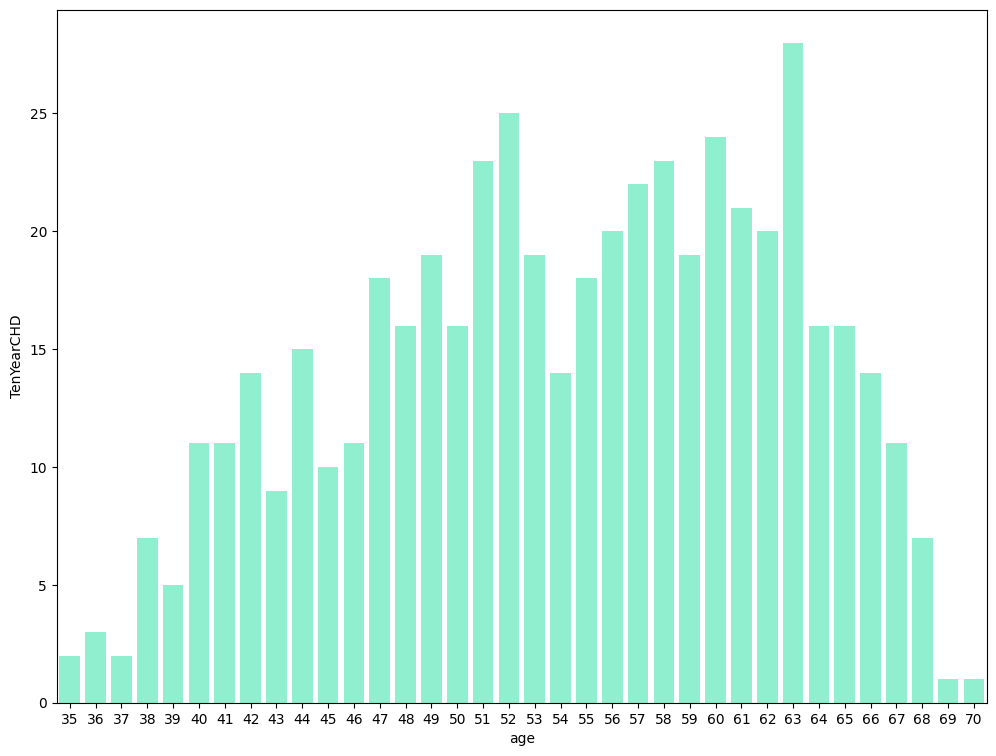

In [23]:
#Count for TenYearCHD vs age 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['age'],color='aquamarine')
plt.ylabel('TenYearCHD')

### The age group at most risk to have positive CHD risk factor is 47 to 65.

## Does the education level affect the ten year CVD risk factor

Text(0, 0.5, 'TenYearCHD')

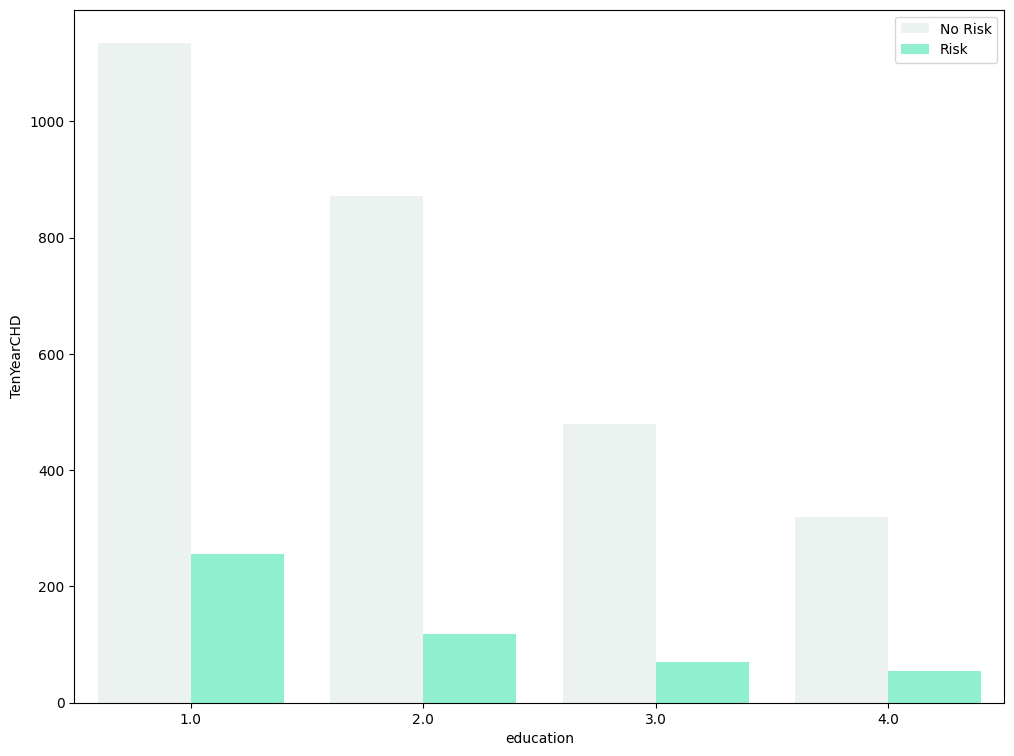

In [24]:
#Count for TenYearCHD vs age 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x='education',color='aquamarine',hue='TenYearCHD')
plt.legend(["No Risk", "Risk"])
plt.ylabel('TenYearCHD')

### We can see that most number of 'At risk' cases are 1st level of education and least number of 'At risk' cases are 4th level.This is misleading result.

### What sex is most likely to suffer from high CHD

In [34]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['sex'].value_counts()

M    272
F    239
Name: sex, dtype: int64

Text(0, 0.5, 'TenYearCHD')

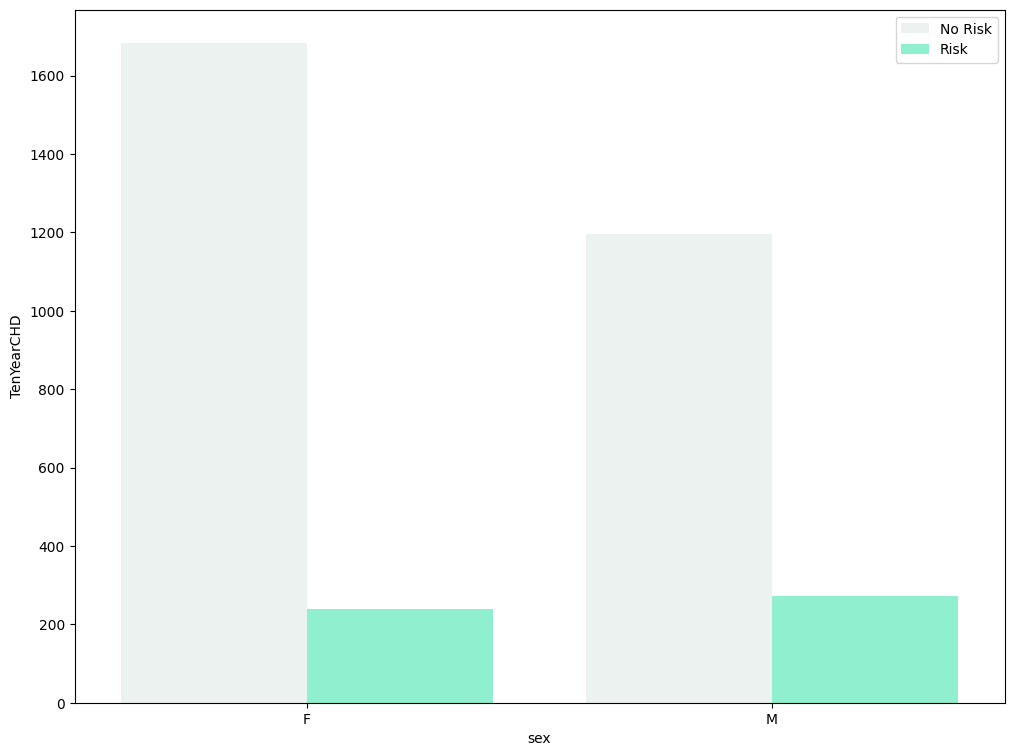

In [25]:
#Count for TenYearCHD vs sex
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x='sex',color='aquamarine',hue='TenYearCHD')
plt.legend(["No Risk", "Risk"])
plt.ylabel('TenYearCHD')

### We can see that there is there is a slight more chances of higher TenYearCHD in males according to the given dataset.

## Effect of smoking on CHD

In [35]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['is_smoking'].value_counts()

YES    275
NO     236
Name: is_smoking, dtype: int64

Text(0, 0.5, 'TenYearCHD')

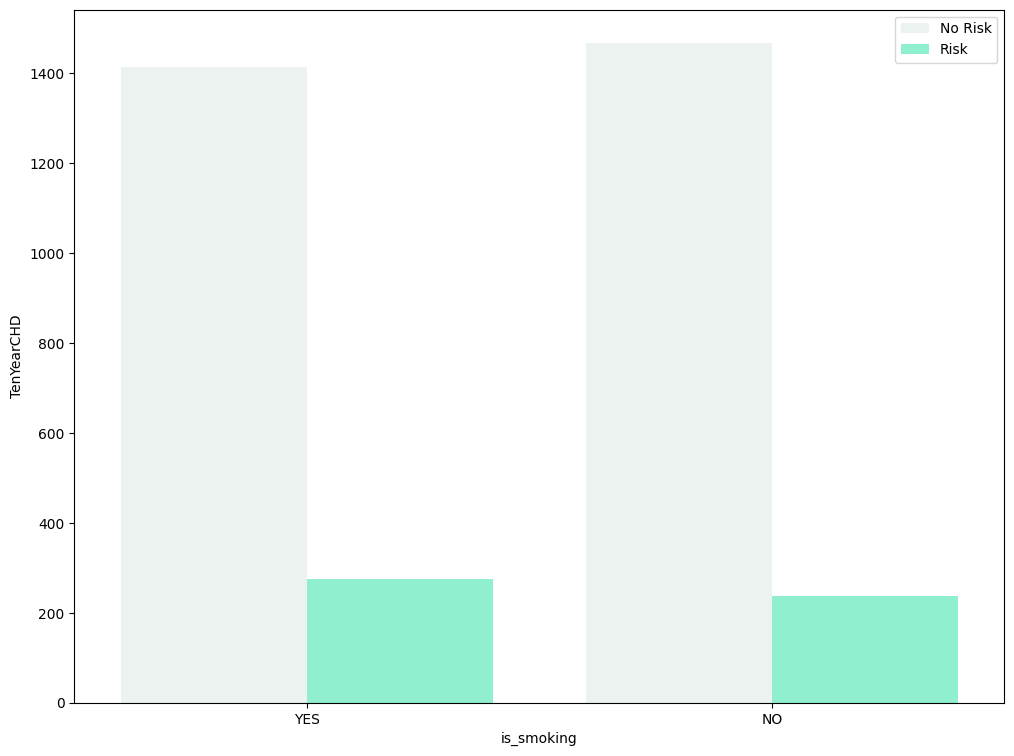

In [26]:
#Count for TenYearCHD vs sex
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x='is_smoking',color='aquamarine',hue='TenYearCHD')
plt.legend(["No Risk", "Risk"])
plt.ylabel('TenYearCHD')

### We can see that there is a slight increase in CHD risk for smoking individuals. 

## Blood pressure medication affect on CHD risk factor

In [33]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['BPMeds'].value_counts()

0.0    471
1.0     33
Name: BPMeds, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of BPMeds')

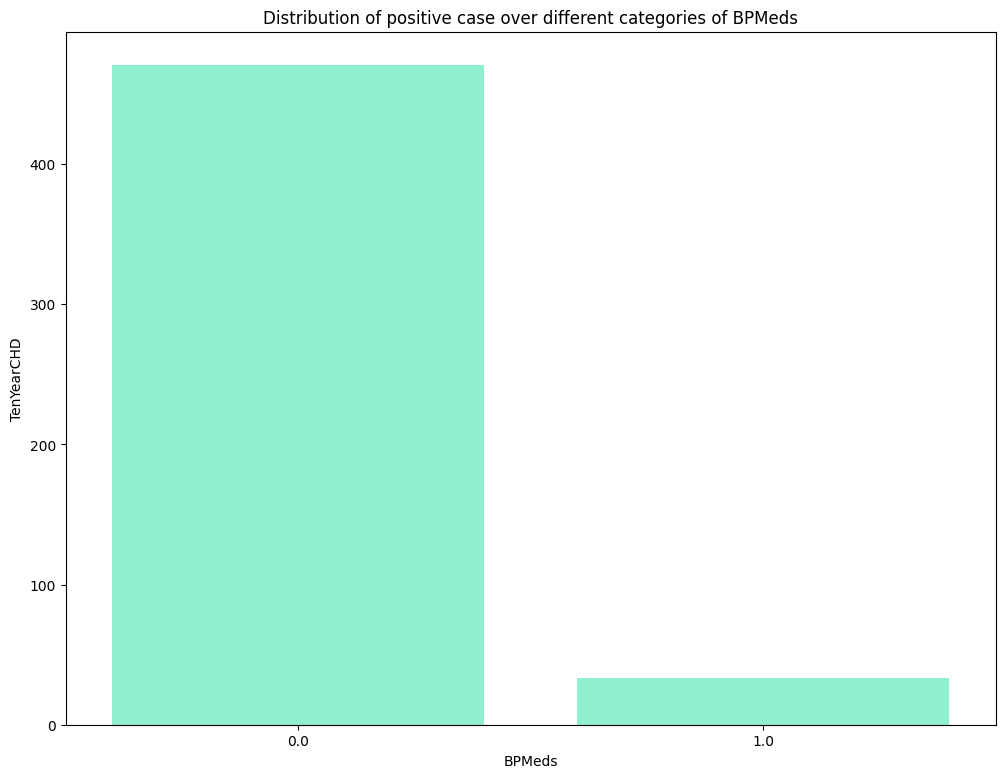

In [27]:
#Count for TenYearCHD vs BPMeds 
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['BPMeds'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of BPMeds')

### We can see that people who are taking BP medication have slightly higher TenYearCHD.

## Does previous strokes affect future CHD risk?

In [36]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentStroke'].value_counts()

0    501
1     10
Name: prevalentStroke, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of prevalentStroke')

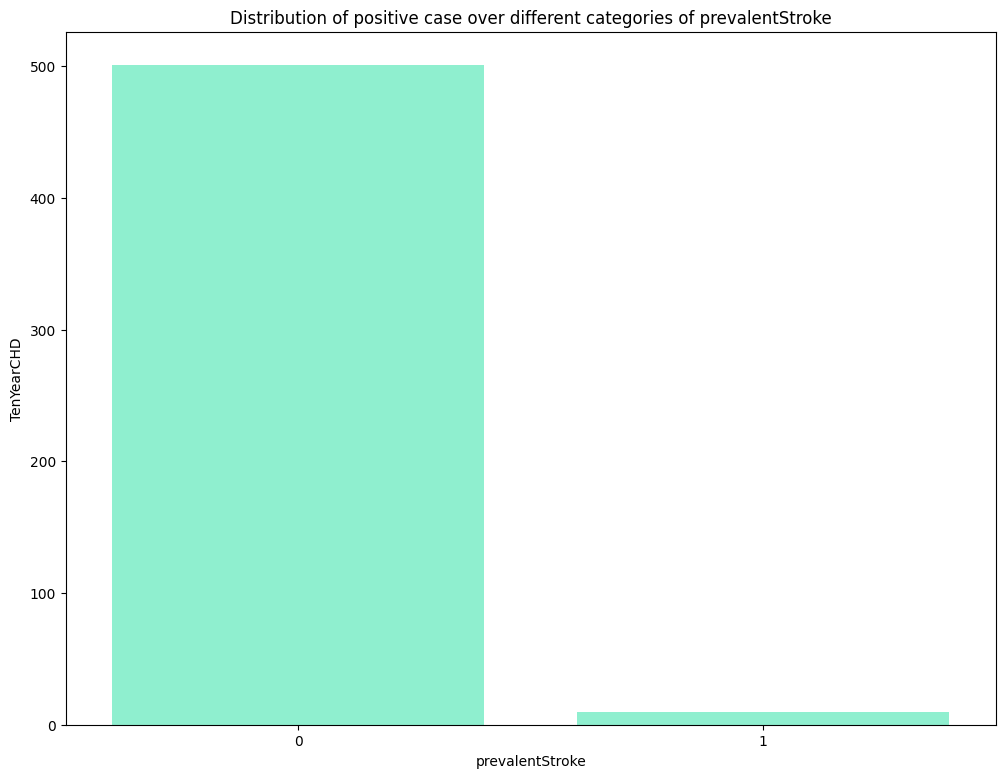

In [28]:
#Count for TenYearCHD vs prevalentStroke
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentStroke'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of prevalentStroke')

### We can see that people with previous stroke are having slighter higher TenYearCHD

## Does hypertention affect the chances of higher TenYearCHD?

In [37]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentHyp'].value_counts()

0    256
1    255
Name: prevalentHyp, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of prevalentHyp')

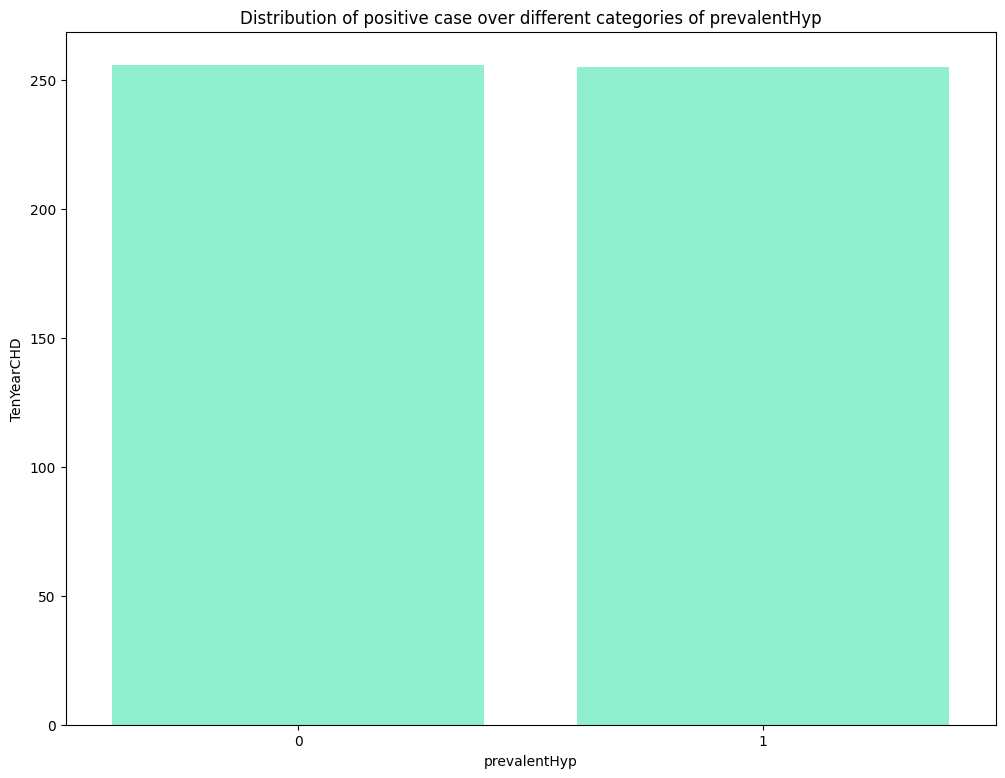

In [29]:
#Count for TenYearCHD vs prevalentHyp	
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['prevalentHyp'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of prevalentHyp')

### We can see that hypertension increases the chances of TenYearCHD by a major factor.

## Effect of Diabeties on TenYearCHD

In [38]:
cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['diabetes'].value_counts()

0    478
1     33
Name: diabetes, dtype: int64

Text(0.5, 1.0, 'Distribution of positive case over different categories of diabetes')

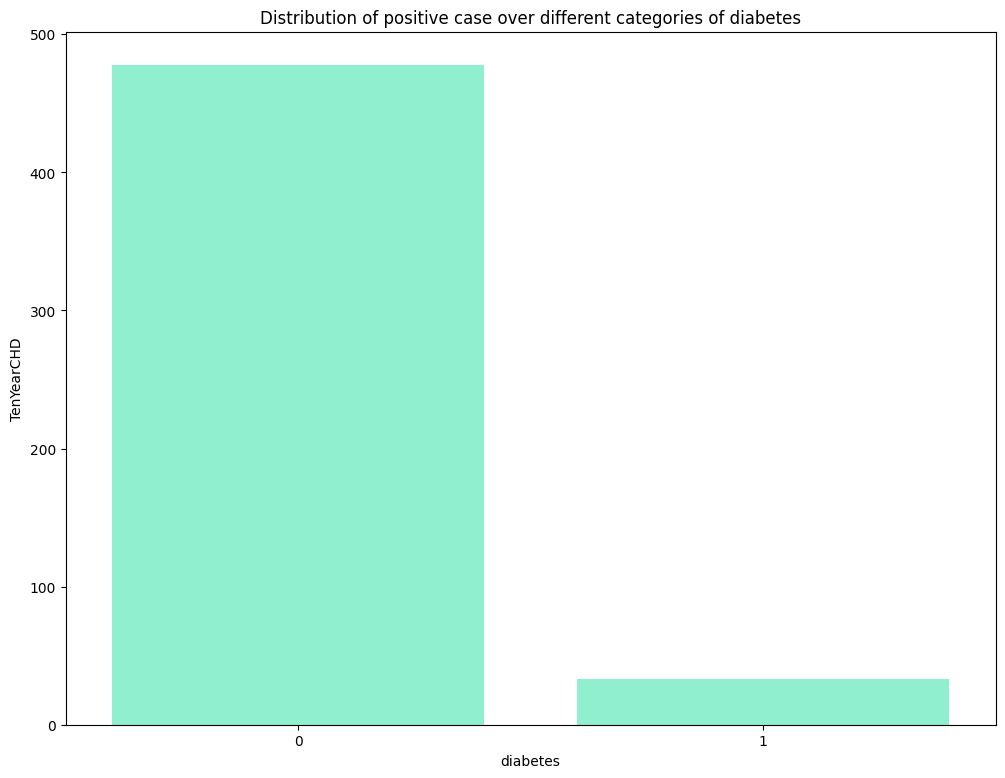

In [30]:
#Count for TenYearCHD vs diabetes	
plt.figure(figsize=(12,9))
sns.countplot(data=cardiovascular_risk_pred,x=cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1]['diabetes'],color='aquamarine')
plt.ylabel('TenYearCHD')
plt.title('Distribution of positive case over different categories of diabetes')

### We can see that there is slightly higher TenYearCHD for individuals with diabetes.

# **Lineplots for the continious variables totChol,sysBP,diaBP,BMI,heartRate,glucose for positive cases of TenYearCHD**

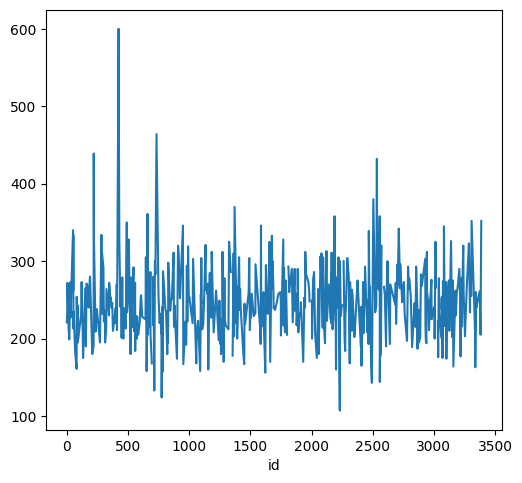

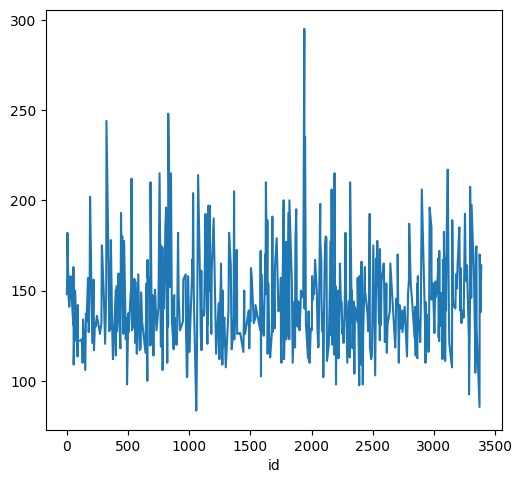

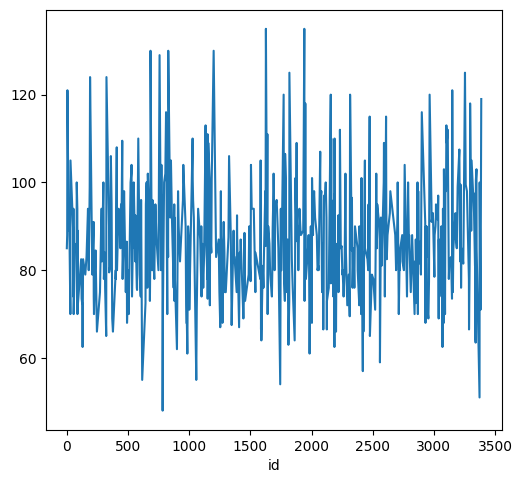

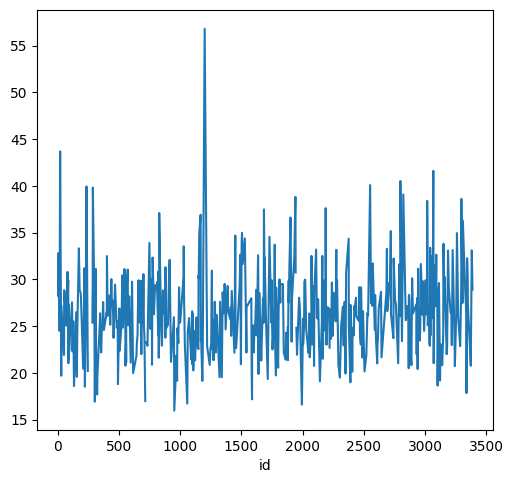

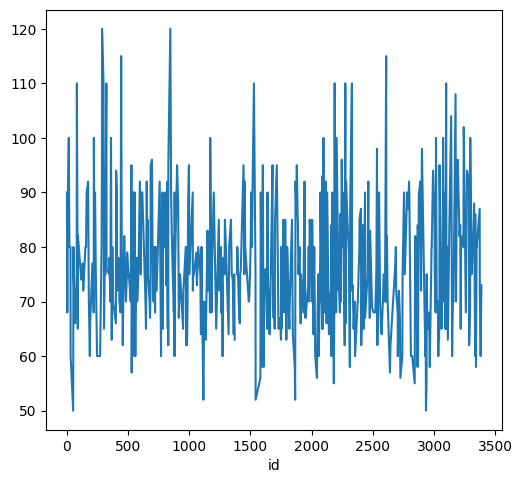

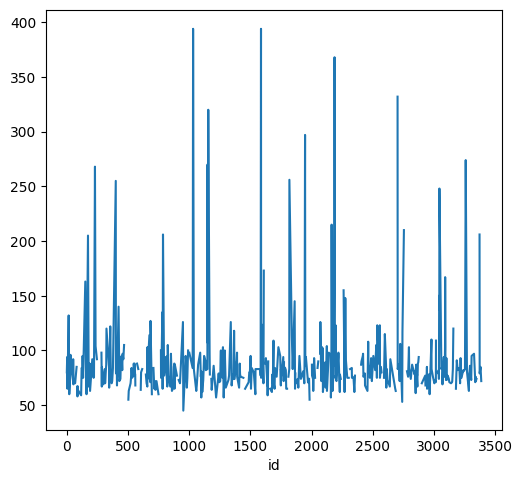

In [48]:
continious_variable_med_list = ['totChol','sysBP','diaBP','BMI','heartRate','glucose']
for index,value in enumerate(continious_variable_med_list):
  plt.figure(figsize=(20,12))
  plt.subplot(2,3,index+1)
  cardiovascular_risk_pred[cardiovascular_risk_pred['TenYearCHD']==1][value].plot()